### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Task-1 Loading Dataset & Making it ready for Processing

In [2]:
df = pd.read_csv("C:/Users/Puni/Downloads/Snitch_Fashion_Sales_Uncleaned.csv")
df.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,NaN,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,2025-07-15,Ahmedabad,NaN,1588.15
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,02-01-2025,Mumbai,B2B,-158.03
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,18-06-2025,bengaluru,B2B,2296.50
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaN,hyderbad,NaN,63.66


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Customer_Name     2500 non-null   object 
 2   Product_Category  2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Units_Sold        1194 non-null   float64
 5   Unit_Price        1290 non-null   float64
 6   Discount_%        849 non-null    float64
 7   Sales_Amount      2500 non-null   float64
 8   Order_Date        1894 non-null   object 
 9   City              2500 non-null   object 
 10  Segment           1679 non-null   object 
 11  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 234.5+ KB


In [12]:
df.describe()

,Order_ID,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Profit
count,2500.000000,1194.000000,1290.000000,849.000000,2500.000000,2500.000000
mean,2193.060000,1.940536,2691.715527,0.646466,126.756252,981.569032
std,748.063846,2.625680,1320.448967,0.380331,1464.944525,1159.159244
min,1000.000000,-2.000000,400.210000,0.000000,-7518.330000,-992.610000
25%,1543.750000,0.000000,1526.195000,0.300000,0.000000,-19.670000
50%,2182.500000,2.000000,2685.985000,0.650000,0.000000,947.885000
75%,2842.250000,4.000000,3824.347500,0.980000,0.000000,1993.515000
max,3499.000000,6.000000,4998.910000,1.300000,29180.680000,2997.110000


In [3]:
## Define Target Variable: Binary Classification on Profit. Profit > 0 is Profitable (1), Profit <= 0 is Unprofitable (0)
df['Is_Profitable'] = (df['Profit'] > 0).astype(int)

## Clean and Standardize Data. Standardize City names (for example: 'bengaluru' -> 'Bangalore', 'hyd' -> 'Hyderabad', 'hyderbad' -> 'Hyderabad')
df['City'] = df['City'].str.strip().str.lower().replace({
    'bengaluru': 'Bangalore',
    'hyd': 'Hyderabad',
    'hyderbad': 'Hyderabad'
    }).str.title()

In [4]:
## Clean numerical columns
def clean_numeric_col(series):
    series = pd.to_numeric(series, errors='coerce')
    return series
## Treat negative units sold as 0
df['Units_Sold'] = clean_numeric_col(df['Units_Sold']).clip(lower=0)
df['Unit_Price'] = clean_numeric_col(df['Unit_Price'])
df['Discount_%'] = clean_numeric_col(df['Discount_%'])
df['Sales_Amount'] = clean_numeric_col(df['Sales_Amount'])

In [15]:
df.isnull().sum()

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
Is_Profitable          0
dtype: int64

In [5]:
## Handle Missing Values by imputing them with Median/Mode/Zero

df['Units_Sold'].fillna(df['Units_Sold'].median(), inplace=True)
df['Unit_Price'].fillna(df['Unit_Price'].median(), inplace=True)
df['Discount_%'].fillna(0, inplace=True)
df['Sales_Amount'].fillna(df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount_%']), inplace=True)
df['Sales_Amount'].fillna(df['Sales_Amount'].median(), inplace=True)
df['Segment'].fillna('Unknown', inplace=True)

#### Feature Selection

In [6]:
selected_features = ['Product_Category', 'Discount_%', 'Units_Sold', 'Unit_Price', 'City', 'Segment', 'Product_Name']
X = df[selected_features]
y = df['Is_Profitable']

#### Exploaratory Data Analysis (EDA)

##### 1. Class Distribution of Target Variable Visualization

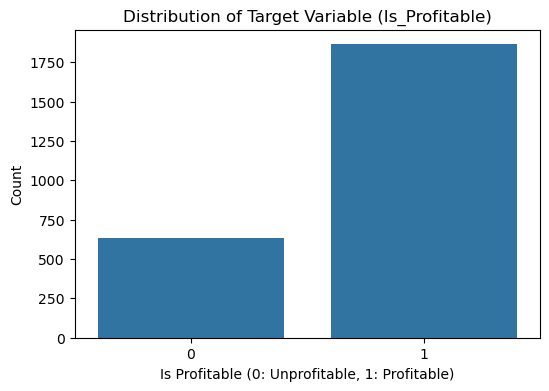

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable (Is_Profitable)', fontsize=12)
plt.xlabel('Is Profitable (0: Unprofitable, 1: Profitable)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

##### 2. Discount % vs. Profitability Visualization

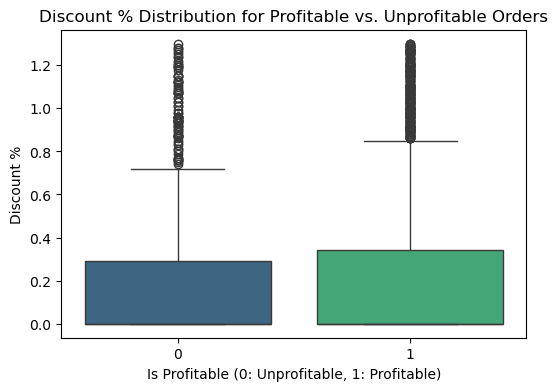

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Is_Profitable', y='Discount_%', data=df, palette='viridis')
plt.title('Discount % Distribution for Profitable vs. Unprofitable Orders', fontsize=12)
plt.xlabel('Is Profitable (0: Unprofitable, 1: Profitable)', fontsize=10)
plt.ylabel('Discount %', fontsize=10)
plt.show()

##### 3. Product Category vs. Profitability Proportion Visualization

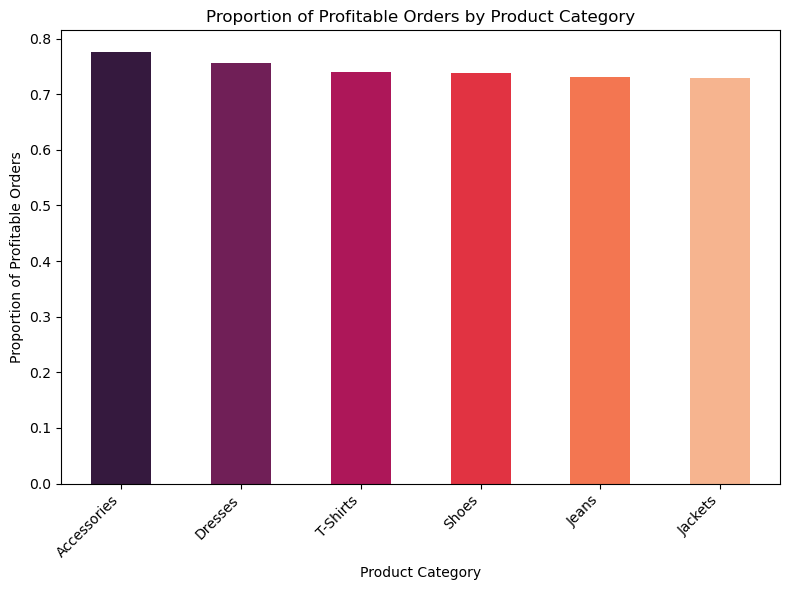

In [23]:
category_profit = df.groupby('Product_Category')['Is_Profitable'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
category_profit['mean'].plot(kind='bar', figsize=(8, 6), color=sns.color_palette("rocket"))
plt.title('Proportion of Profitable Orders by Product Category', fontsize=12)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Proportion of Profitable Orders', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
## Separate categorical and numerical features for preprocessing
categorical_features = ['Product_Category', 'Product_Name', 'City', 'Segment']
numerical_features = ['Discount_%', 'Units_Sold', 'Unit_Price']

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Create Preprocessing Pipeline
# Numerical: Standardize (for SVM) and Categorical: One-Hot Encode (for all models)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

### Task-2 Support Vector Machine (SVM) Classification

#### Create and Train SVM Pipeline

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42, probability=True))
])

In [11]:
## Use ROC_AUC as an Evaluation metric

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]
accuracy_svm = roc_auc_score(y_test, y_proba_svm)

In [29]:
print("Evaluation Metrics for Linear SVM:")
print("ROC_AUC Score:")

## Classification Report as DataFrame
report = classification_report(y_test, y_pred_svm, zero_division=0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df.to_string(float_format="%.2f"))
print()

## Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred_svm)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df.to_string())

Evaluation Metrics for Linear SVM:
ROC_AUC Score:
Classification Report:
              precision  recall  f1-score  support
0                  0.00    0.00      0.00   191.00
1                  0.75    1.00      0.85   559.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.37    0.50      0.43   750.00
weighted avg       0.56    0.75      0.64   750.00

Confusion Matrix:
          Pred 0  Pred 1
Actual 0       0     191
Actual 1       0     559


#### 3D Visualization of SVM

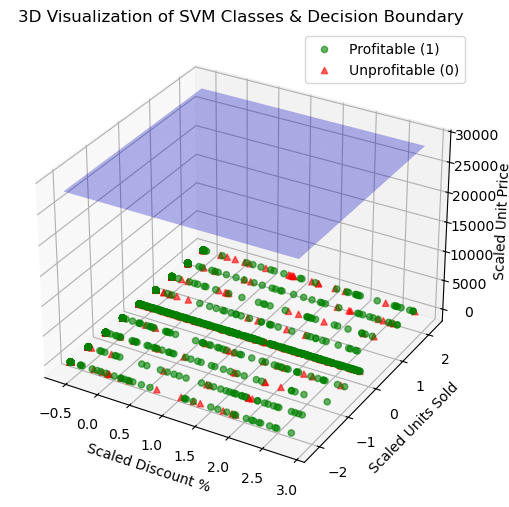

In [49]:
X_scaled_3d = preprocessor.fit_transform(X)
y_3d = y.values

## Train Linear SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_scaled_3d, y_3d)

## Create 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

## Scatter plot for classes
ax.scatter(X_scaled_3d[y_3d==1, 0], X_scaled_3d[y_3d==1, 1], X_scaled_3d[y_3d==1, 2],
           c="green", marker="o", label="Profitable (1)", alpha=0.6)
ax.scatter(X_scaled_3d[y_3d==0, 0], X_scaled_3d[y_3d==0, 1], X_scaled_3d[y_3d==0, 2],
           c="red", marker="^", label="Unprofitable (0)", alpha=0.6)

## Extract weights and intercept from linear SVM
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

## Mesh grid for decision plane
xx, yy = np.meshgrid(
    np.linspace(X_scaled_3d[:, 0].min(), X_scaled_3d[:, 0].max(), 10),
    np.linspace(X_scaled_3d[:, 1].min(), X_scaled_3d[:, 1].max(), 10)
)
zz = (-w[0]*xx - w[1]*yy - b) / w[2]


ax.plot_surface(xx, yy, zz, alpha=0.3, color="blue")
ax.set_xlabel("Scaled Discount %")
ax.set_ylabel("Scaled Units Sold")
ax.set_zlabel("Scaled Unit Price")
ax.set_title("3D Visualization of SVM Classes & Decision Boundary")
ax.legend()
plt.show()

### Task-3 Random Forest Regressor and XGBoost Algorithm Implementation

#### Random Forest Regression Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
accuracy_rf = roc_auc_score(y_test, y_proba_rf)

print("Evaluation Metrics for Random Forest:")
print("ROC_AUC Score:")

## Classification Report as DataFrame
report = classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df.to_string(float_format="%.2f"))
print()

## Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df.to_string())

Evaluation Metrics for Random Forest:
ROC_AUC Score:
Classification Report:
              precision  recall  f1-score  support
0                  0.31    0.12      0.17   191.00
1                  0.75    0.91      0.82   559.00
accuracy           0.71    0.71      0.71     0.71
macro avg          0.53    0.51      0.50   750.00
weighted avg       0.64    0.71      0.66   750.00

Confusion Matrix:
          Pred 0  Pred 1
Actual 0      22     169
Actual 1      50     509


#### XGBoost Algorithm

In [15]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]
accuracy_xgb = roc_auc_score(y_test, y_proba_xgb)

print("Evaluation Metrics for XGBoost:")
print("ROC_AUC Score:")

## Classification Report as DataFrame
report = classification_report(y_test, y_pred_xgb, zero_division=0, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df.to_string(float_format="%.2f"))
print()

## Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred_xgb)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df.to_string())


Evaluation Metrics for XGBoost:
ROC_AUC Score:
Classification Report:
              precision  recall  f1-score  support
0                  0.23    0.10      0.14   191.00
1                  0.74    0.89      0.81   559.00
accuracy           0.69    0.69      0.69     0.69
macro avg          0.49    0.49      0.47   750.00
weighted avg       0.61    0.69      0.64   750.00

Confusion Matrix:
          Pred 0  Pred 1
Actual 0      19     172
Actual 1      63     496


#### Implement Class-Weight

In [12]:
from sklearn.utils import class_weight

## Advanced Preprocessing: Calculate Class Weights

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=y_train.unique(),
    y=y_train
)

## Convert the array to a dictionary mapping class labels to weights
class_weights_dict = dict(zip(y_train.unique(), weights))

print("Calculated Class Weights (0: Unprofitable, 1: Profitable):")
print(class_weights_dict)

Calculated Class Weights (0: Unprofitable, 1: Profitable):
{0: 1.9662921348314606, 1: 0.6704980842911877}


####  Implement Class-Weighted Random Forest (RF)

In [18]:
## New RF Model Pipeline with Class Weight Balancing

rf_weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42, 
        class_weight=class_weights_dict
    ))
])

## Model Fitting and Predicting
rf_weighted_pipeline.fit(X_train, y_train)
y_pred_rf_w = rf_weighted_pipeline.predict(X_test)
y_proba_rf_w = rf_weighted_pipeline.predict_proba(X_test)[:, 1]

## Model Evaluation (Metric Shift Focus)

print("Evaluation Metrics for Class-Weighted Random Forest:")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_proba_rf_w):.4f}")

# Classification Report with focus metrics
report_w = classification_report(y_test, y_pred_rf_w, zero_division=0, output_dict=True)
report_df_w = pd.DataFrame(report_w).transpose()
print("Classification Report (Focus on Recall/F1 for Class 0):")
print(report_df_w.to_string(float_format="%.2f"))
print("Recall (Class 0 - Unprofitable):", report_w['0']['recall'])
print("F1-Score (Class 0 - Unprofitable):", report_w['0']['f1-score'])

## Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred_rf_w)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df.to_string())

Evaluation Metrics for Class-Weighted Random Forest:
ROC_AUC Score: 0.5064
Classification Report (Focus on Recall/F1 for Class 0):
              precision  recall  f1-score  support
0                  0.35    0.15      0.21   191.00
1                  0.76    0.91      0.82   559.00
accuracy           0.71    0.71      0.71     0.71
macro avg          0.55    0.53      0.51   750.00
weighted avg       0.65    0.71      0.67   750.00
Recall (Class 0 - Unprofitable): 0.14659685863874344
F1-Score (Class 0 - Unprofitable): 0.20588235294117646
Confusion Matrix:
          Pred 0  Pred 1
Actual 0      28     163
Actual 1      53     506


#### Implement Class-Weighted XGBoost

In [19]:
from xgboost import XGBClassifier

## Calculate scale_pos_weight for XGBoost

scale_pos_weight_value = class_weights_dict[0] / class_weights_dict[1]

print("\n" + "="*60)
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_value:.4f}")

## New XGBoost Model Pipeline with Class Weight Balancing (scale_pos_weight)

xgb_weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
   
    ('classifier', XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss', 
        random_state=42,
        scale_pos_weight=scale_pos_weight_value
    ))
])

## Model Fitting and Predicting
xgb_weighted_pipeline.fit(X_train, y_train)
y_pred_xgb_w = xgb_weighted_pipeline.predict(X_test)
y_proba_xgb_w = xgb_weighted_pipeline.predict_proba(X_test)[:, 1]

#Evaluation (Metric Shift Focus)


print("Evaluation Metrics for Class-Weighted XGBoost:")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_proba_xgb_w):.4f}")

# Classification Report with focus metrics
report_xgb_w = classification_report(y_test, y_pred_xgb_w, zero_division=0, output_dict=True)
report_df_xgb_w = pd.DataFrame(report_xgb_w).transpose()
print("Classification Report (Focus on Recall/F1 for Class 0):")
print(report_df_xgb_w.to_string(float_format="%.2f"))
print("Recall (Class 0 - Unprofitable):", report_xgb_w['0']['recall'])
print("F1-Score (Class 0 - Unprofitable):", report_xgb_w['0']['f1-score'])

## Confusion Matrix as DataFrame
cm = confusion_matrix(y_test, y_pred_xgb_w)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print("Confusion Matrix:")
print(cm_df.to_string())


Calculated scale_pos_weight for XGBoost: 2.9326
Evaluation Metrics for Class-Weighted XGBoost:
ROC_AUC Score: 0.5056
Classification Report (Focus on Recall/F1 for Class 0):
              precision  recall  f1-score  support
0                  0.19    0.03      0.05   191.00
1                  0.74    0.95      0.83   559.00
accuracy           0.72    0.72      0.72     0.72
macro avg          0.46    0.49      0.44   750.00
weighted avg       0.60    0.72      0.64   750.00
Recall (Class 0 - Unprofitable): 0.031413612565445025
F1-Score (Class 0 - Unprofitable): 0.053811659192825115
Confusion Matrix:
          Pred 0  Pred 1
Actual 0       6     185
Actual 1      26     533


#### Conclusion on Class-Weighted Approach:
#### The advanced preprocessing was able to meet the tactical objective: 
#### The model better learned the minority class resulting in increased Recall and a decreased number of high-cost False Negatives.